In [100]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings

# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv('BlackFriday.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Analyzing the columns

In [7]:
print('Number of users:', df['User_ID'].nunique())
print('Number of Products:', df['Product_ID'].nunique())

Number of users: 5891
Number of Products: 3623


In [8]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [10]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

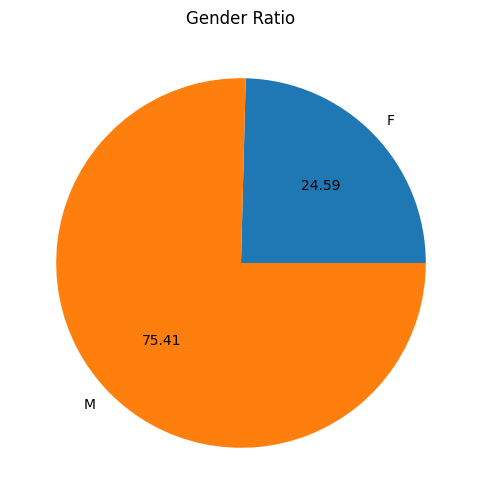

In [11]:
df_gender = df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.2f", title = "Gender Ratio" , figsize = (6,6))


In [12]:
#df.groupby('Gender').sum()['Purchase']

<Axes: title={'center': 'Distribution of age'}, xlabel='Age'>

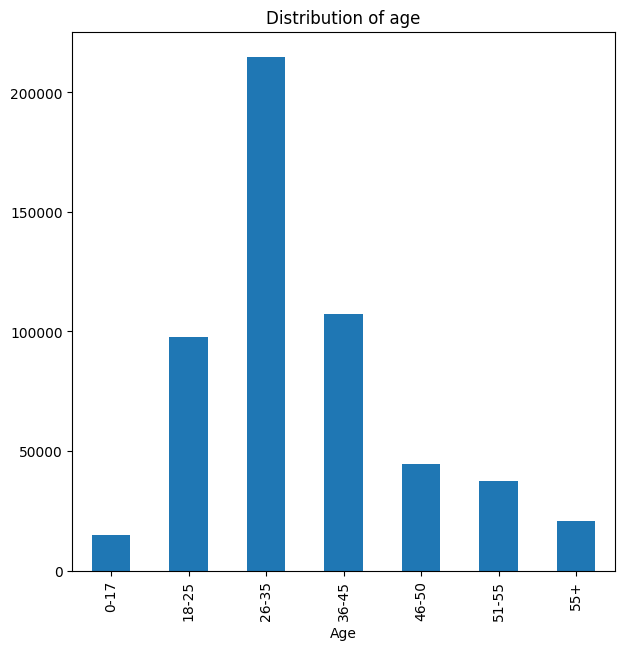

In [16]:
df.groupby('Age').size().plot(kind = 'bar', title = 'Distribution of age', figsize = (7,7))

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

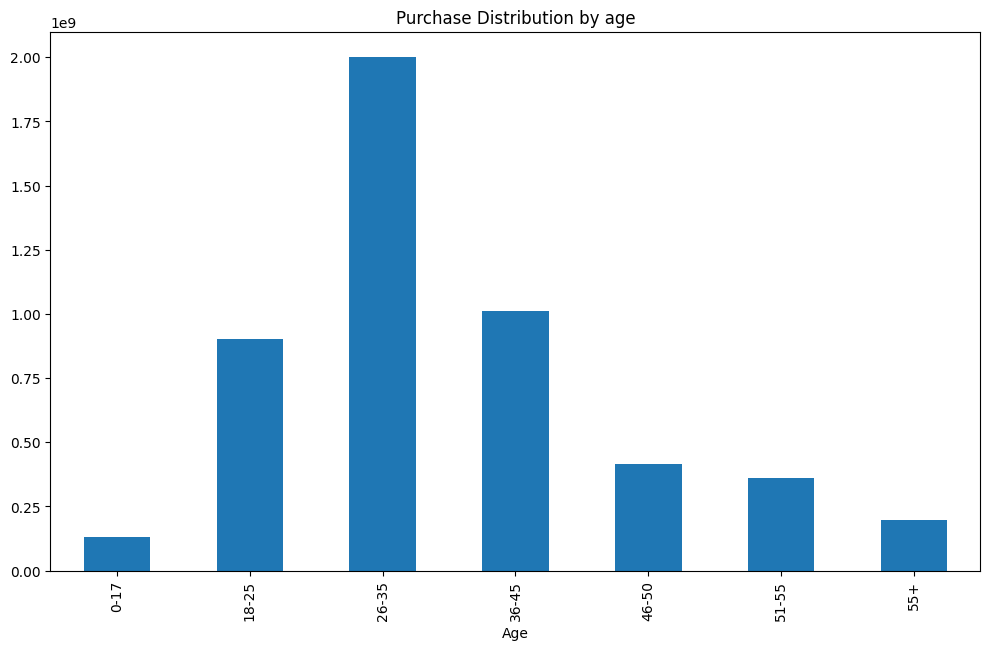

In [13]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', title = 'Purchase Distribution by age', figsize = (12,7))

Text(0.5, 1.0, 'Martial status')

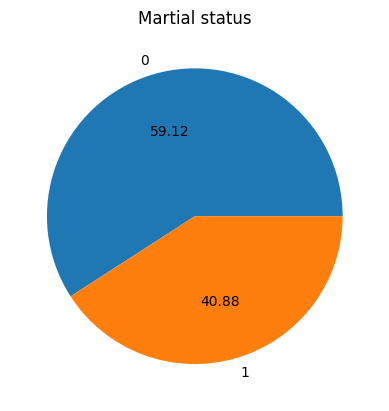

In [20]:
df.groupby('Marital_Status').size().plot(kind = 'pie' , autopct = '%.2f')
plt.title('Martial status')

<Axes: ylabel='Purchase'>

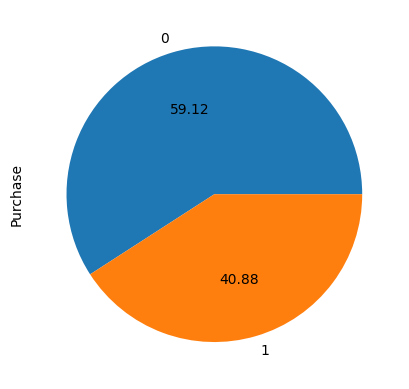

In [18]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind = 'pie' , autopct = '%.2f')

Multi column Analysis

Text(0.5, 1.0, 'Age category Divided by Gender')

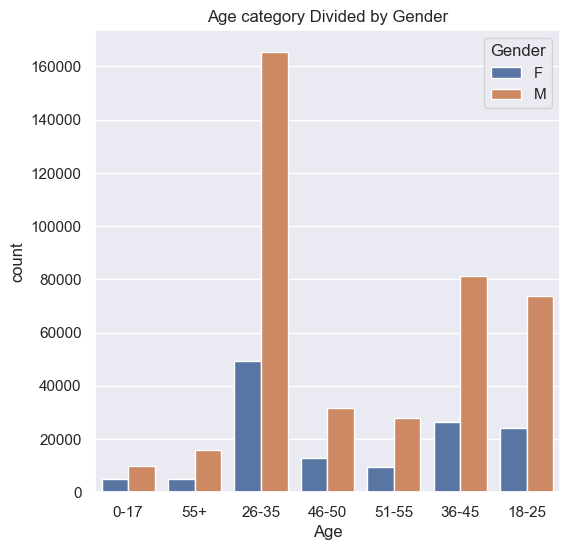

In [112]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = 'Age' , hue='Gender', data=df)
plt.title('Age category Divided by Gender')

<Axes: xlabel='City_Category', ylabel='count'>

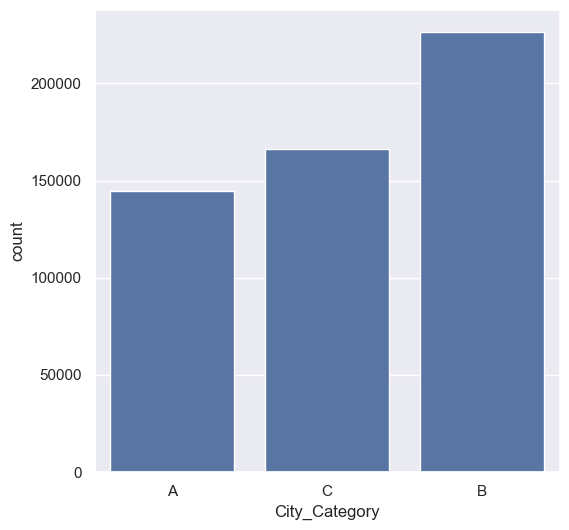

In [30]:
sns.countplot(x = df['City_Category'])

Text(0.5, 1.0, 'Age Category by City')

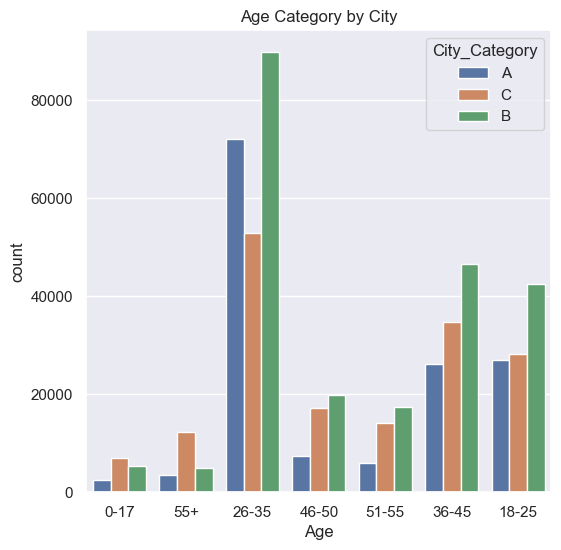

In [111]:
sns.countplot(x = 'Age' , hue='City_Category', data=df)
plt.title('Age Category by City')

<Axes: xlabel='Marital_Status', ylabel='count'>

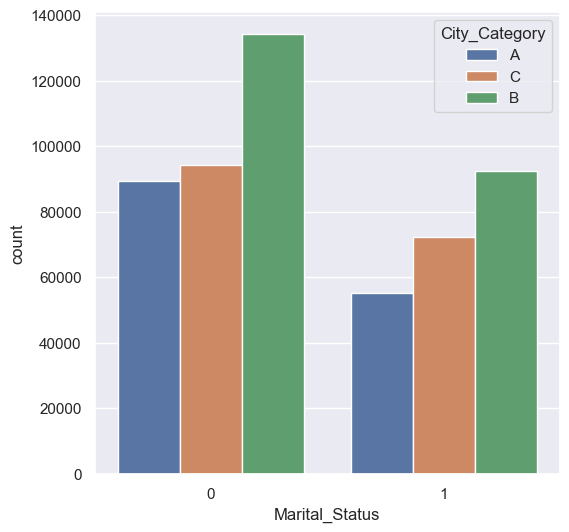

In [110]:
sns.countplot(x = 'Marital_Status' , hue='City_Category', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

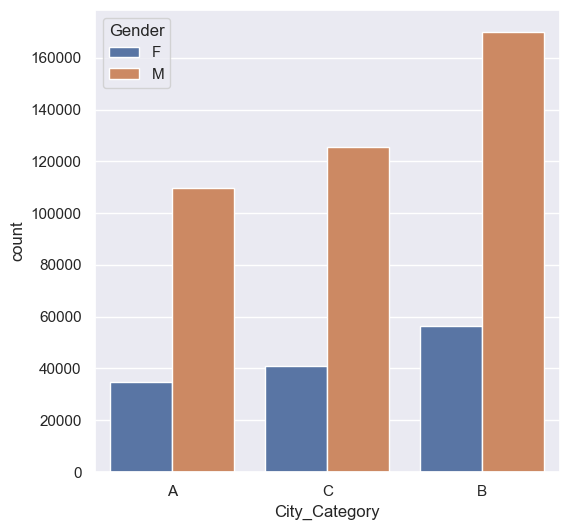

In [109]:
sns.countplot(x = 'City_Category' , hue='Gender', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

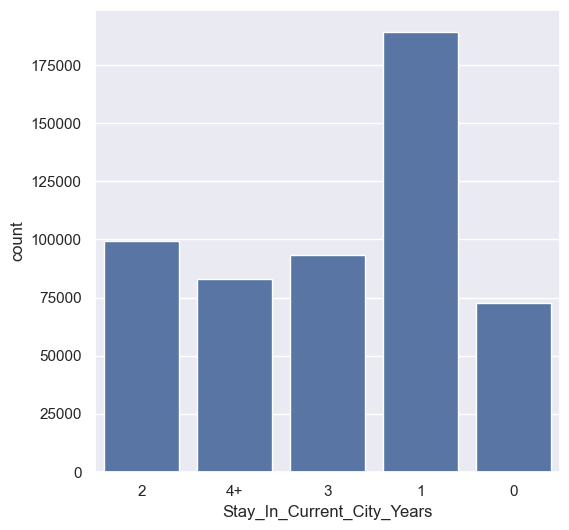

In [38]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

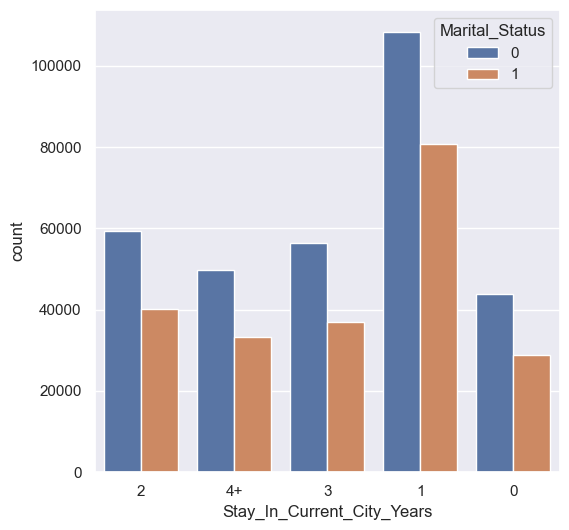

In [108]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

Occupation and Product Analysis

<Axes: xlabel='Occupation', ylabel='count'>

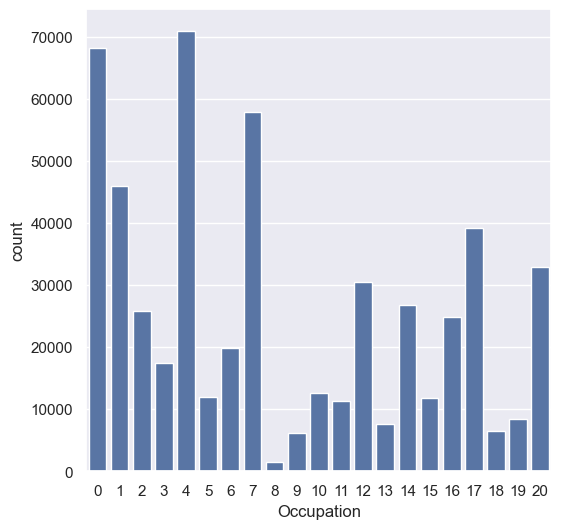

In [41]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation', ylabel='count'>

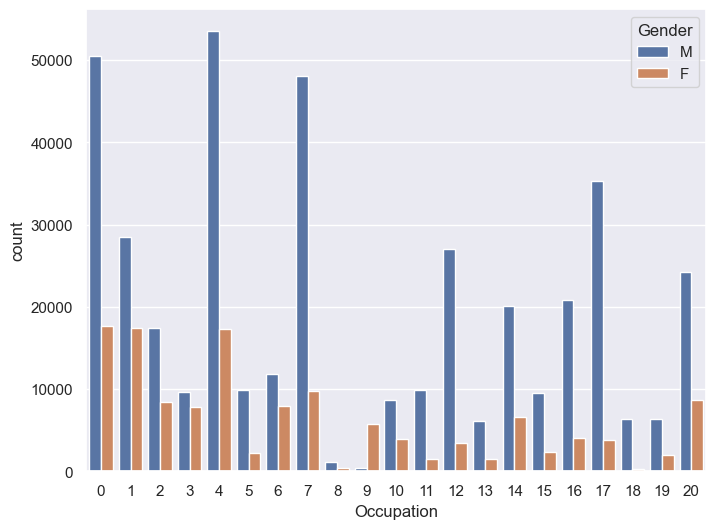

In [107]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['Occupation'], hue = df['Gender'])

<Axes: xlabel='Occupation', ylabel='count'>

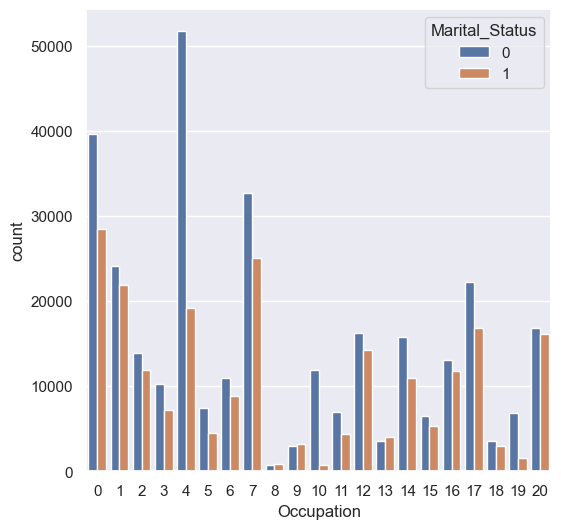

In [106]:
sns.countplot(x = df['Occupation'], hue = df['Marital_Status'])

<Axes: xlabel='Occupation'>

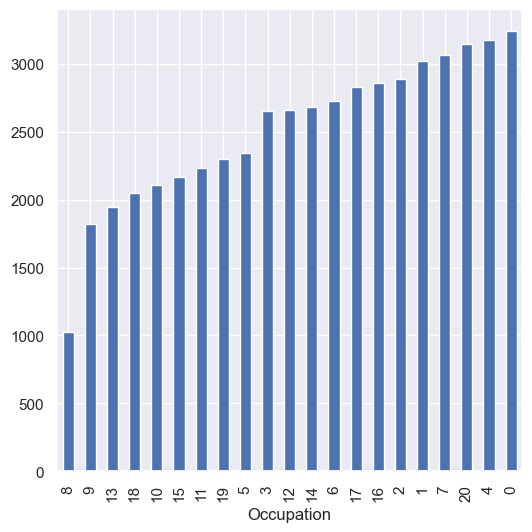

In [50]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

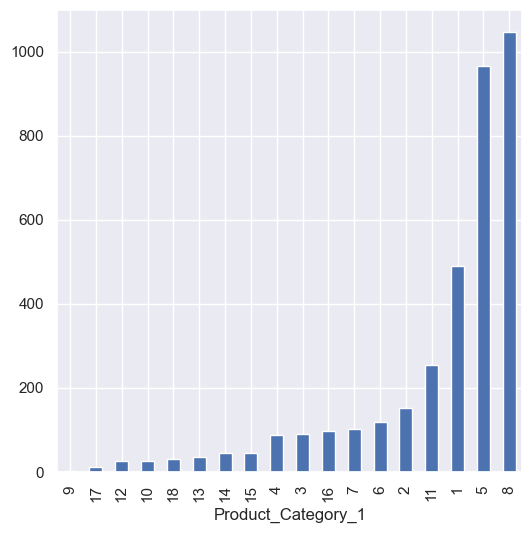

In [57]:
df.groupby('Product_Category_1').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

Text(0.5, 1.0, 'Best Seller')

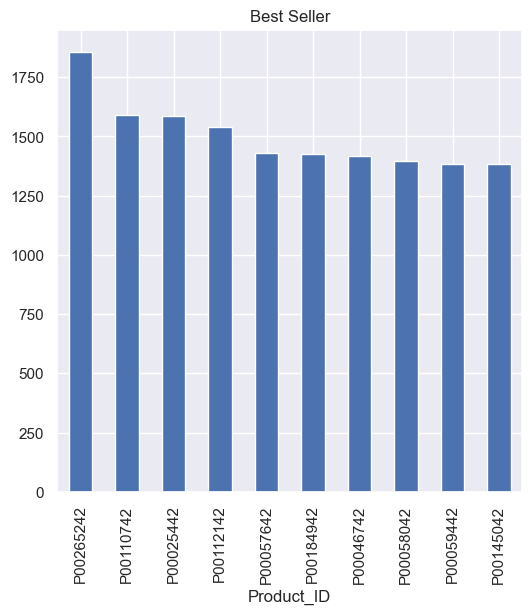

In [61]:
df.groupby('Product_ID').size().nlargest(10).plot(kind= 'bar')
plt.title('Best Seller')

Text(0.5, 1.0, 'Products Generating High income')

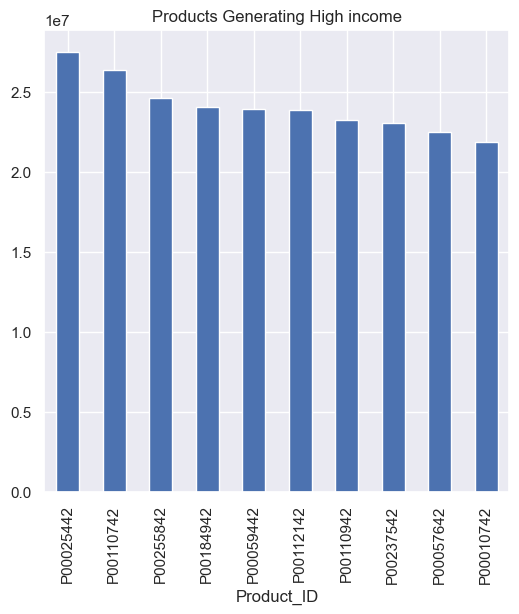

In [67]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind= 'bar')
plt.title('Products Generating High income')

<Axes: xlabel='Product_ID'>

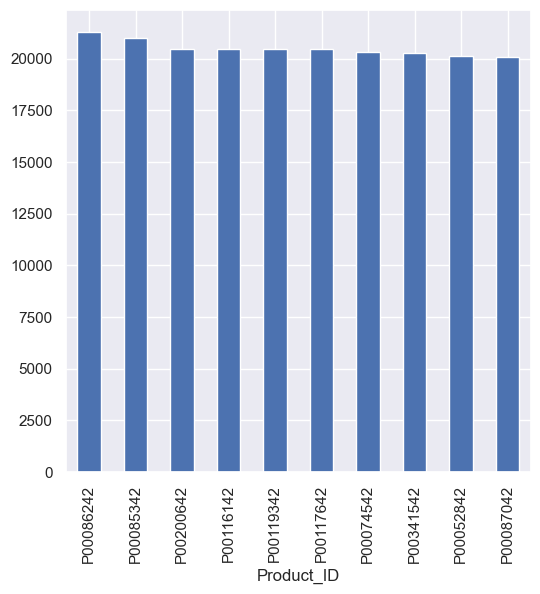

In [78]:
df.groupby('Product_ID').mean(numeric_only=True)['Purchase'].nlargest(10).plot(kind = 'bar')

Text(0.5, 1.0, 'Best users')

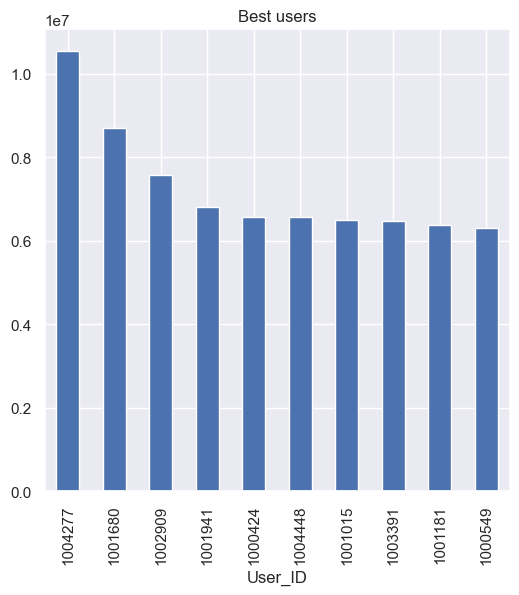

In [74]:
df.groupby('User_ID').sum()['Purchase'].nlargest(10).plot(kind = 'bar')
plt.title('Best users')

Combing Marital status and Gender

In [85]:
df['Marital_Gender'] = df['Gender'] + '_' + df['Marital_Status'].astype(str)

In [86]:
df['Marital_Gender'].nunique()

4

In [87]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M_0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227,M_0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,M_1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854,M_1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686,M_1
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871,M_1


<Axes: xlabel='Marital_Gender', ylabel='count'>

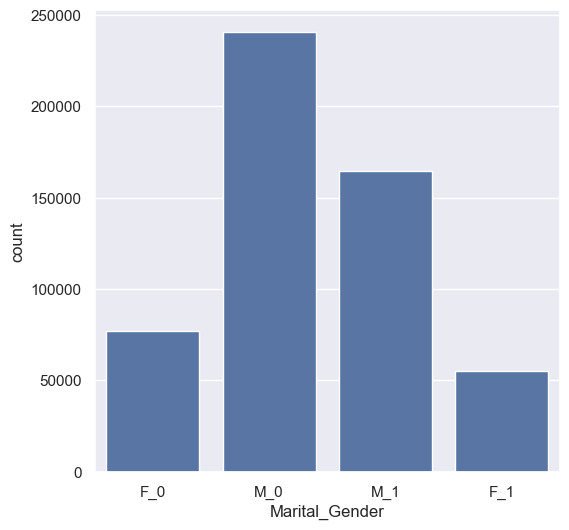

In [88]:
sns.countplot(x = df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

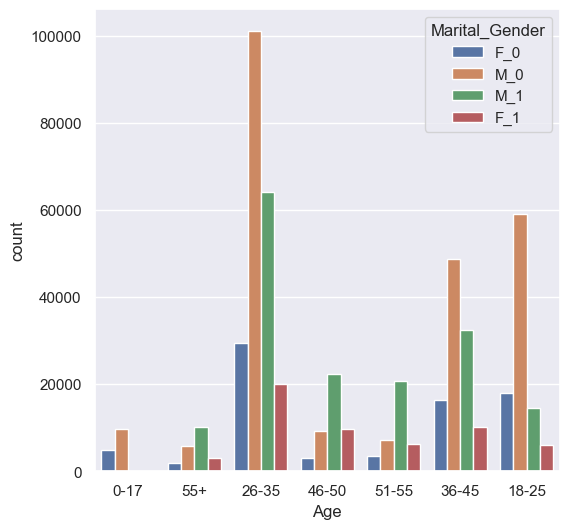

In [105]:
sns.countplot(x = df['Age'], hue = df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

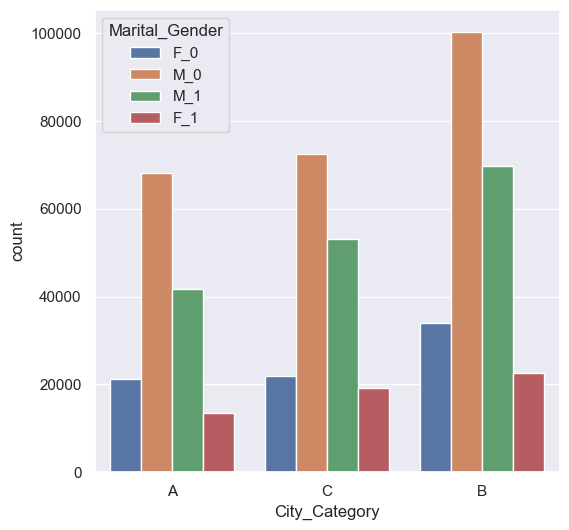

In [104]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

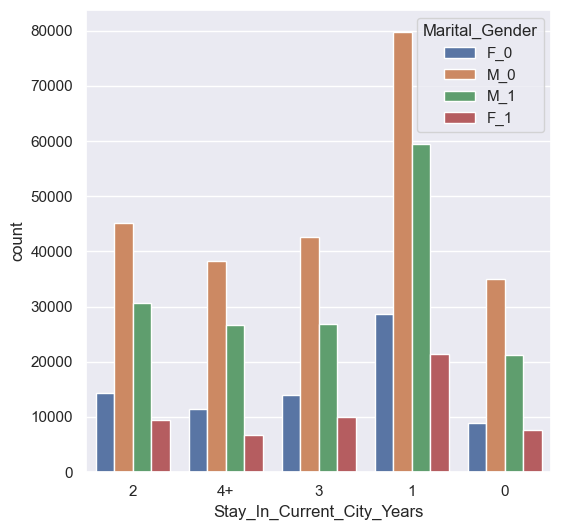

In [103]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

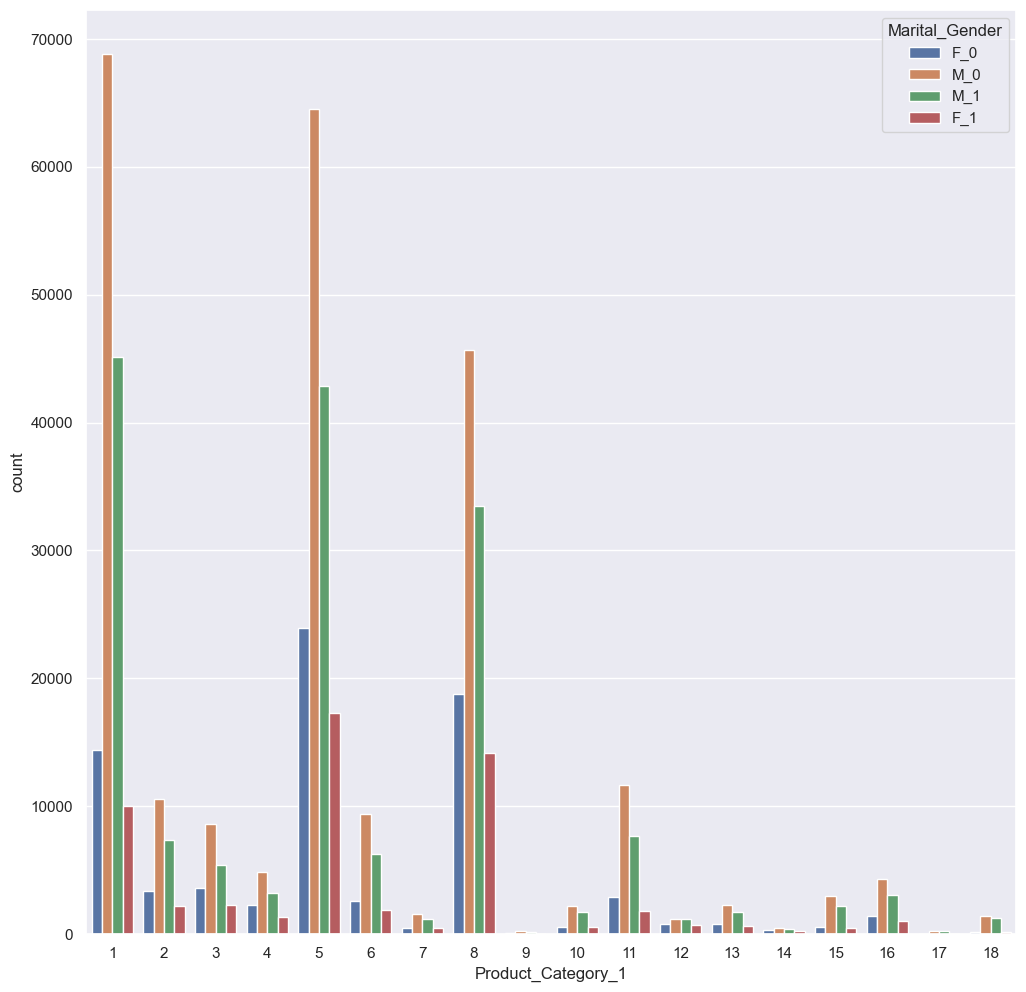

In [102]:
plt.figure(figsize=(12,12))
sns.countplot(x = df['Product_Category_1'], hue = df['Marital_Gender'])


<Axes: xlabel='Age', ylabel='count'>

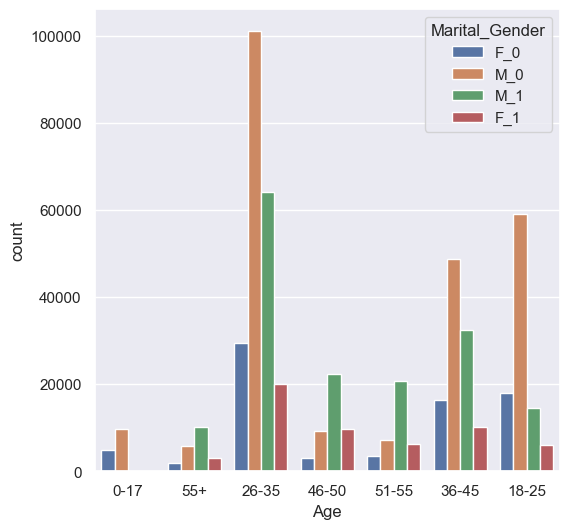

In [101]:
sns.countplot(x = df['Age'], hue = df['Marital_Gender'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Marital_Gender              537577 non-null  object 
dtypes: float64(2),